In [1]:
from code.neuron import *
from code.encodingsource import *
from code.hsgs import *
from code.classical_neuron import *
from code.classical_pso import *
from code.sf import *
simulator = Aer.get_backend('qasm_simulator')
import pandas as pd
import numpy as np
import math
from qiskit.tools.visualization import plot_histogram, plot_state_city

## makePhaseEncodingV1

#### Teste 1: Vetores reais iguais

In [ ]:
inputVector = [0.8, 0.8, 0.5, 0.3, 0.8, 0.8, 0.5, 0.3]

weightVector = [0.8, 0.8, 0.5, 0.3, 0.8, 0.8, 0.5, 0.3]

In [ ]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding-phase', ancilla=True)

In [ ]:
executeNeuron(neuron, simulator, threshold=None)

#### Teste 2: Vetores reais inversamente proporcionais

In [ ]:
inputVector = [0.8, 0.8, 0.1, 0.3, 0.25, 0.9, 0.0, 0.5]

weightVector = [0.2, 0.2, 0.9, 0.7, 0.75, 0.1, 1.0, 0.5]

In [ ]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding-phase', ancilla=True)
executeNeuron(neuron, simulator, threshold=None)

#### Teste 3: Vetores binários 

In [ ]:
inputVector = [1, 1, -1, -1]
weightVector = [0.2, 0.2, 0.9, 0.7]

In [ ]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding-phase', ancilla=True)
executeNeuron(neuron, simulator, threshold=None)

#### DEBUGGING

In [14]:
inputVector = [1, 1]
weightVector = [1.0656854249492382, 0.028761101961531033]

inputVector = [math.sqrt(inputVector[0]**2 + inputVector[1]**2), math.atan(inputVector[0]/inputVector[1])]
print(inputVector)

[1.4142135623730951, 0.7853981633974483]


In [15]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding-phase')
a = executeNeuron(neuron, simulator, threshold=None)

In [16]:
a

0.6405029296875

#### Teste 2: Vetores reais inversamente proporcionais

In [4]:
inputVector = [1, 1]
weightVector = [-0.707106781187, 0.707106781187]

In [6]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding')
executeNeuron(neuron, simulator, threshold=None)

(0.3643798828125, <Figure size 504x360 with 1 Axes>)

In [ ]:
inputVector = [-1, -1]
weightVector = [-1, 1]
neuron = createNeuron(inputVector, weightVector, 'hsgs')
executeNeuron(neuron, simulator, threshold=None)

## Paper Vizualizations

In [59]:
inputVector = [0.8, 0.7, 0.4, 0.1]
weightVector = [0.2, 0.3, 0.6, 0.9]

In [60]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding')
a, b = executeNeuron(neuron, simulator, threshold=None)
a

0.0999755859375

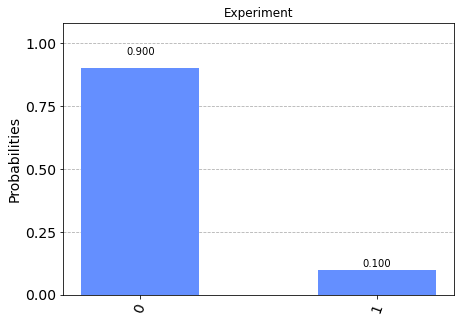

In [61]:
b

In [69]:
input_ = [-1, 1] #[[-1, -1],  [-1,1], [1,1], [1,-1]]

inputVector = input_ #+[1]*len(input_)
weightVector = [0.7828, 0.0287] #[-0.02325, 0.2094, 0.4767, 0.7094] #[0.5, 0.5, 1.0, 1.0]
inputVector

[-1, 1]

In [70]:
inputVector = [math.sqrt(inputVector[i]**2 + inputVector[i+1]**2) for i in range(0, len(inputVector), 2)] + [math.atan(inputVector[i]/inputVector[i+1]) for i in range(0, len(inputVector), 2)] 
inputVector

[1.4142135623730951, -0.7853981633974483]

In [71]:
neuron = createNeuron(inputVector, weightVector, 'phase-encoding')
a, b = executeNeuron(neuron, simulator, threshold=None)
a

0.4097900390625

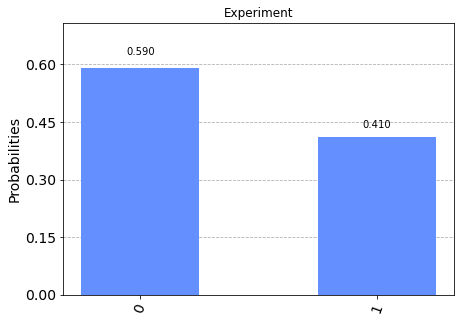

In [72]:
b

## Equation 5 Testing

In [62]:
import math 

#### Teste 1: Vetores reais iguais

In [63]:
from cmath import sqrt, exp

# normalizacao
thetas = [math.pi*i for i in inputVector]
phis =  [math.pi*i for i in weightVector]

# criar vetor com valores de theta_i - phi_i
eis = [thetas[i]-phis[i] for i in range(len(thetas)) ] 
expi = [exp(x*sqrt(-1)) for x in eis] 

# calculo final equacao 5
(1/(len(expi))) * sum(expi)

(5.551115123125783e-17+0.18163563200134022j)

#### Teste 2: Vetores reais inversamente proporcionais

In [ ]:
from cmath import sqrt, exp

# normalizacao
thetas = normalizePi([0.8, 0.8, 0.5, 0.3, 0.0, 0.5, 0.0, 0.2])
phis = normalizePi([0.2, 0.2, 0.5, 0.7, 1.0, 0.5, 1.0, 0.8])

# criar vetor com valores de theta_i - phi_i
eis = [thetas[i]-phis[i] for i in range(len(thetas)) ] 
expi = [exp(x*sqrt(-1)) for x in eis] 

# calculo final equacao 5
(1/(2**len(expi))) * sum(expi)

#### Teste 3: Vetores Binários Iguais

In [ ]:
from cmath import sqrt, exp

# normalizacao
thetas = normalizePi([1, 1, -1, -1])
phis = normalizePi([0.2, 0.2, 0.9, 0.7])

# criar vetor com valores de theta_i - phi_i
eis = [thetas[i]-phis[i] for i in range(len(thetas)) ] 
expi = [exp(x*sqrt(-1)) for x in eis] 

# calculo final equacao 5
(1/(2**len(expi))) * sum(expi)

#### Teste 4: Vetores Binários Inversamente proporcionais

In [ ]:
from cmath import sqrt, exp

# normalizacao
thetas = normalizePi([-1, 1, 1, -1])
phis = normalizePi([1, -1, -1, 1])

# criar vetor com valores de theta_i - phi_i
eis = [thetas[i]-phis[i] for i in range(len(thetas)) ] 
expi = [exp(x*sqrt(-1)) for x in eis] 

# calculo final equacao 5
(1/(2**len(expi))) * sum(expi)